In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.12777771,  3.71247462],
       [ 6.90347268, -4.23310678],
       [ 7.58087803, -4.20343983],
       ...,
       [-5.2099571 , -9.18971889],
       [-1.86820151,  3.47440583],
       [-2.58214136,  2.31004685]])

In [4]:
y

array([1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1,

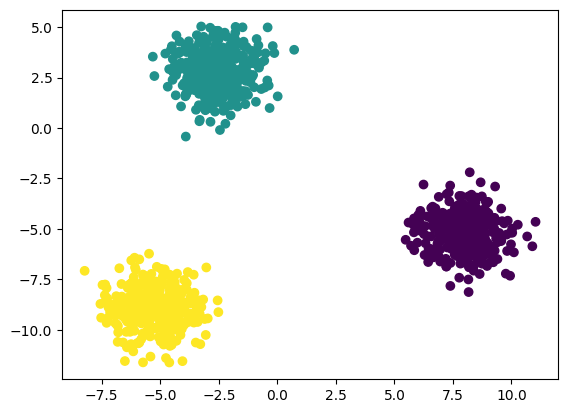

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000002,
 711.6645503463667,
 46.73719899618692,
 41.33995709877894,
 34.27361850086841,
 28.968682865363956,
 30.444408254153004,
 27.206284415690096,
 20.500891808805363,
 19.13640106950426]

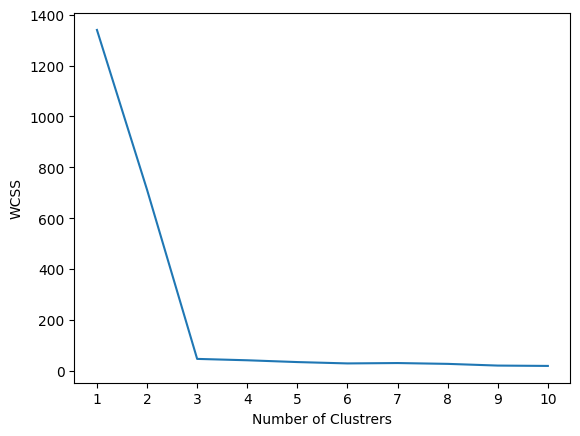

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0,
       1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0,

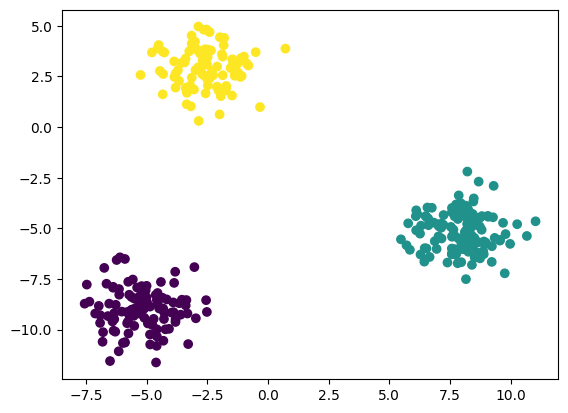

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [19]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from kneed import KneeLocator

In [21]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:
kl.elbow

np.int64(3)

In [23]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[np.float64(0.5754460152445495),
 np.float64(0.8566701302250039),
 np.float64(0.673395413167675),
 np.float64(0.5176847395526272),
 np.float64(0.33458886162058377),
 np.float64(0.507315520292867),
 np.float64(0.33547144185817324),
 np.float64(0.3253411885304302),
 np.float64(0.34074571463363784)]

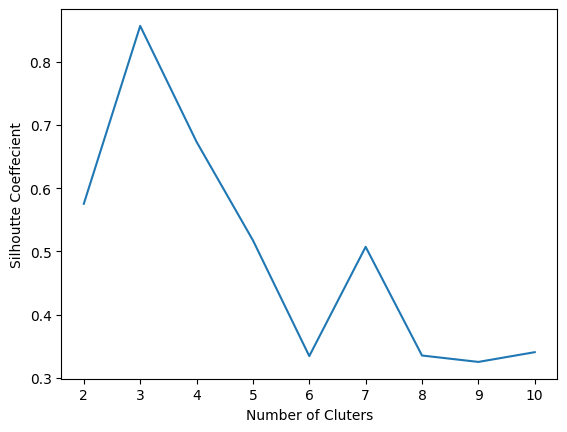

In [26]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()